In [1]:
import pandas as pd
import numpy as np
import os
from LocalModule import *

In [2]:
df = pd.read_csv('G:/Project/ProjectData/FactTable(F).csv')

In [3]:
df.drop(['ScheduledTime'],axis = 1, inplace = True)

In [4]:
df['domint'].replace(True, 'DOM', inplace = True)
df['domint'].replace(False, 'INT', inplace = True)

### Read and check Data

In [5]:
df.head()

,FlightDate,FlightNo,ACType,Route,CgoKgs,TotalPax,BaseStation,BagPcs,FlightType,Airline,domint,Capacity,INF,CHD,ADL,ArrDep,C
0,2015-01-01,JI770,A320,YVF-AAH,0,185,AAH,26,PAX,JI,DOM,180.0,9,18,158,A,0
1,2015-01-01,JI237,A320,AAH-YVF,0,146,AAH,10,PAX,JI,DOM,180.0,4,19,123,D,0
2,2015-01-01,UV251,A320,YVF-AAH,654,176,AAH,51,PAX,UV,DOM,180.0,5,16,155,A,0
3,2015-01-01,UV277,A320,AAH-YVF,3713,152,AAH,32,PAX,UV,DOM,180.0,6,23,123,D,0
4,2015-01-01,UV340,A320,USR-AAH,3713,171,AAH,57,PAX,UV,DOM,180.0,2,10,159,A,0


In [6]:
df.tail()

,FlightDate,FlightNo,ACType,Route,CgoKgs,TotalPax,BaseStation,BagPcs,FlightType,Airline,domint,Capacity,INF,CHD,ADL,ArrDep,C
3765426,2022-12-31,HS2652,A321,UYK-USR,0,132,UYK,58,PAX,HS,DOM,220.0,3,13,116,D,0
3765427,2022-12-31,WV6588,AT72,DVA-YVF,0,57,DVA,27,PAX,WV,DOM,78.0,1,2,54,D,0
3765428,2022-12-31,WV8206,AT72,YVF-DVA,0,48,DVA,14,PAX,WV,DOM,78.0,0,4,44,A,0
3765429,2022-12-31,NR2476,ERJ-190,USR-DVA,122,76,DVA,23,PAX,NR,DOM,114.0,1,8,67,A,1
3765430,2022-12-31,NR8488,ERJ-190,DVA-USR,350,69,DVA,46,PAX,NR,DOM,114.0,1,2,66,D,2


In [7]:
df.describe()

,CgoKgs,TotalPax,BagPcs,Capacity,INF,CHD,ADL,C
count,3.765431e+06,3.765431e+06,3.765431e+06,3.692198e+06,3.765431e+06,3.765431e+06,3.765431e+06,3.765431e+06
mean,2.222278e+03,1.469107e+02,4.521322e+01,2.063297e+02,2.211495e+00,9.518734e+00,1.351684e+02,2.267611e+00
std,7.470068e+03,7.304258e+01,6.656194e+02,5.497228e+01,3.655376e+00,9.706058e+00,6.839064e+01,8.309300e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.160000e+02,0.000000e+00,1.800000e+02,0.000000e+00,2.000000e+00,1.070000e+02,0.000000e+00
50%,7.100000e+01,1.580000e+02,1.700000e+01,2.200000e+02,1.000000e+00,7.000000e+00,1.450000e+02,0.000000e+00
75%,1.465000e+03,1.820000e+02,7.000000e+01,2.200000e+02,3.000000e+00,1.400000e+01,1.680000e+02,0.000000e+00
max,1.313700e+06,5.168100e+04,1.271606e+06,4.670000e+02,1.800000e+03,1.303000e+03,5.168100e+04,1.600230e+05


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765431 entries, 0 to 3765430
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   FlightDate   object 
 1   FlightNo     object 
 2   ACType       object 
 3   Route        object 
 4   CgoKgs       int64  
 5   TotalPax     int64  
 6   BaseStation  object 
 7   BagPcs       int64  
 8   FlightType   object 
 9   Airline      object 
 10  domint       object 
 11  Capacity     float64
 12  INF          int64  
 13  CHD          int64  
 14  ADL          int64  
 15  ArrDep       object 
 16  C            int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 488.4+ MB


In [9]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

In [10]:
df.columns

Index(['FlightDate', 'FlightNo', 'ACType', 'Route', 'CgoKgs', 'TotalPax',
       'BaseStation', 'BagPcs', 'FlightType', 'Airline', 'domint', 'Capacity',
       'INF', 'CHD', 'ADL', 'ArrDep', 'C'],
      dtype='object')

### Split Data

In [11]:
df_category = df.select_dtypes(include='object')

In [12]:
df_numeric = df.select_dtypes(exclude='object')

In [13]:
df_numeric.head()

,FlightDate,CgoKgs,TotalPax,BagPcs,Capacity,INF,CHD,ADL,C
0,2015-01-01,0,185,26,180.0,9,18,158,0
1,2015-01-01,0,146,10,180.0,4,19,123,0
2,2015-01-01,654,176,51,180.0,5,16,155,0
3,2015-01-01,3713,152,32,180.0,6,23,123,0
4,2015-01-01,3713,171,57,180.0,2,10,159,0


In [14]:
df_numeric.drop(['FlightDate'], inplace = True, axis = 1)

### Univariate Analysis

#### Numeric variable

In [15]:
for col in df_numeric.columns:
    check_central_tendency(col,df_numeric)

Variable: CgoKgs, Min: 0, Max: 1313700, Mean: 2222.278, Median: 71.0, Mode: 0, Range: 1313700
Variable: TotalPax, Min: 0, Max: 51681, Mean: 146.911, Median: 158.0, Mode: 0, Range: 51681
Variable: BagPcs, Min: 0, Max: 1271606, Mean: 45.213, Median: 17.0, Mode: 0, Range: 1271606
Variable: Capacity, Min: 9.0, Max: 467.0, Mean: 206.33, Median: 220.0, Mode: 220.0, Range: 458.0
Variable: INF, Min: 0, Max: 1800, Mean: 2.211, Median: 1.0, Mode: 0, Range: 1800
Variable: CHD, Min: 0, Max: 1303, Mean: 9.519, Median: 7.0, Mode: 0, Range: 1303
Variable: ADL, Min: 0, Max: 51681, Mean: 135.168, Median: 145.0, Mode: 0, Range: 51681
Variable: C, Min: 0, Max: 160023, Mean: 2.268, Median: 0.0, Mode: 0, Range: 160023


In [16]:
for col in df_numeric.columns:
    check_dispersion(col, df_numeric)

Variable: CgoKgs, Q1: 0.0, Q3: 1465.0, IQR: 1465.0, Variance: 55801918.887,     Std: 7470.068, Skew: 10.267, Kutosis: 464.75
Variable: TotalPax, Q1: 116.0, Q3: 182.0, IQR: 66.0, Variance: 5335.219,     Std: 73.043, Skew: 94.645, Kutosis: 66085.358
Variable: BagPcs, Q1: 0.0, Q3: 70.0, IQR: 70.0, Variance: 443049.235,     Std: 665.619, Skew: 1853.028, Kutosis: 3537109.915
Variable: Capacity, Q1: 180.0, Q3: 220.0, IQR: 40.0, Variance: 3021.952,     Std: 54.972, Skew: 0.663, Kutosis: 3.918
Variable: INF, Q1: 0.0, Q3: 3.0, IQR: 3.0, Variance: 13.362,     Std: 3.655, Skew: 53.324, Kutosis: 16946.468
Variable: CHD, Q1: 2.0, Q3: 14.0, IQR: 12.0, Variance: 94.208,     Std: 9.706, Skew: 3.137, Kutosis: 109.16
Variable: ADL, Q1: 107.0, Q3: 168.0, IQR: 61.0, Variance: 4677.279,     Std: 68.391, Skew: 115.476, Kutosis: 86058.982
Variable: C, Q1: 0.0, Q3: 0.0, IQR: 0.0, Variance: 6904.446,     Std: 83.093, Skew: 1896.908, Kutosis: 3652864.619


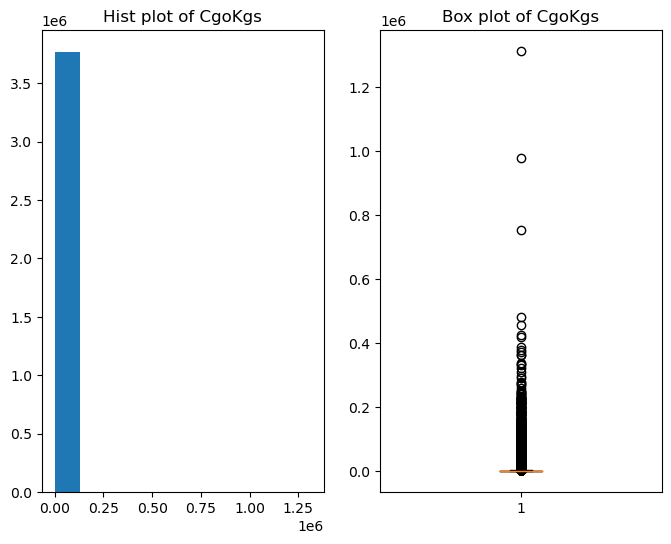

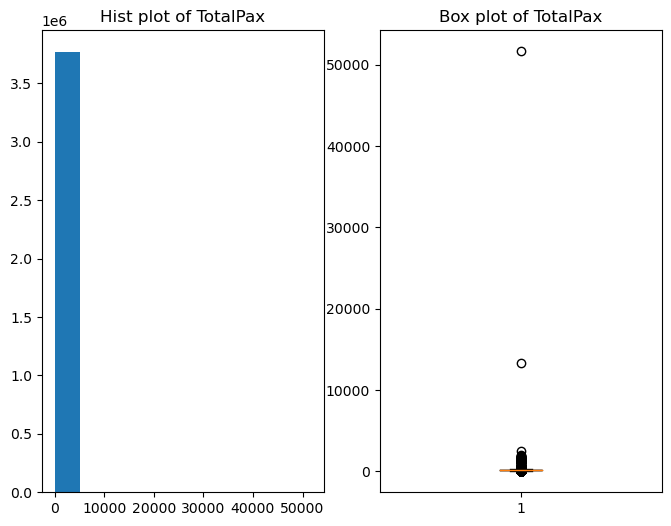

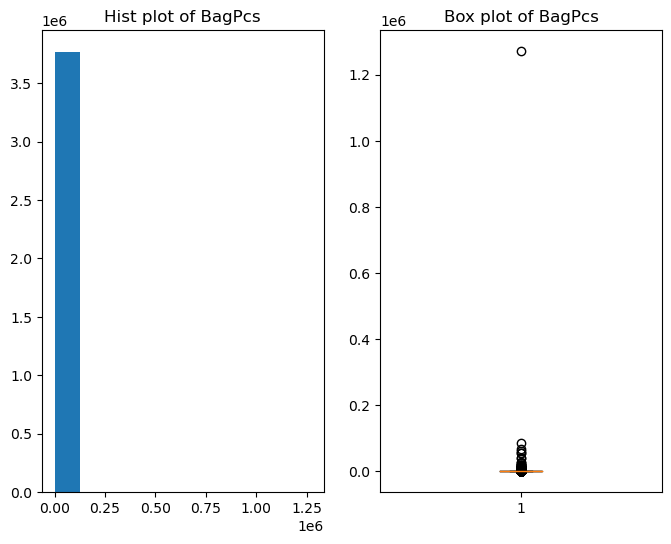

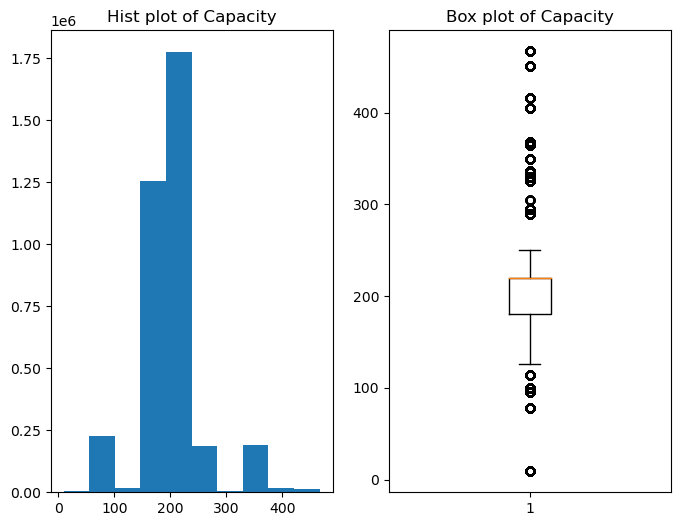

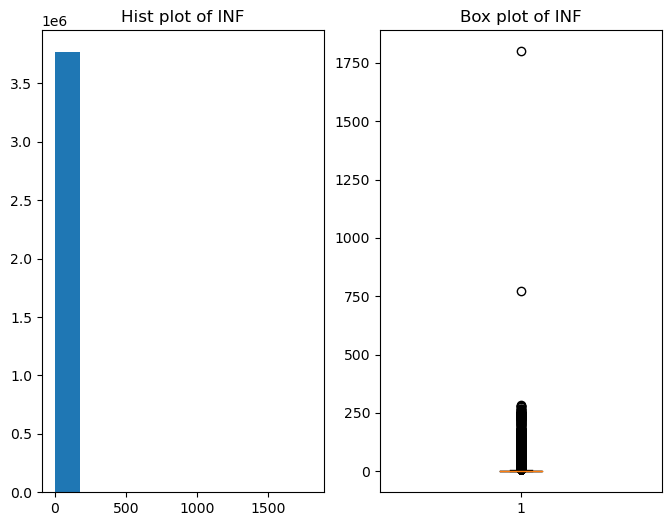

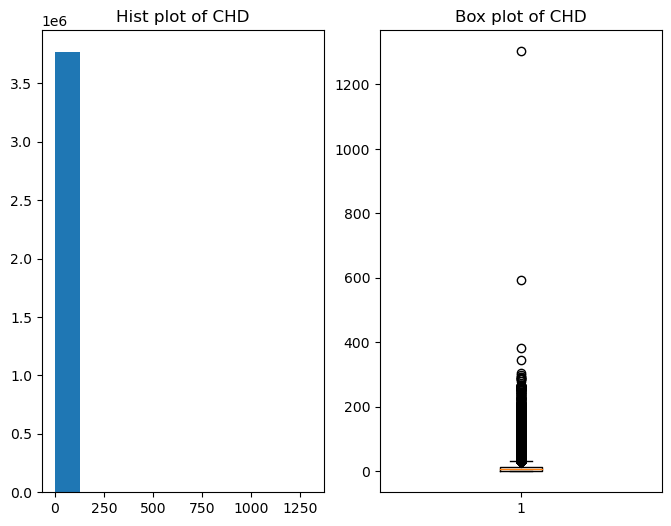

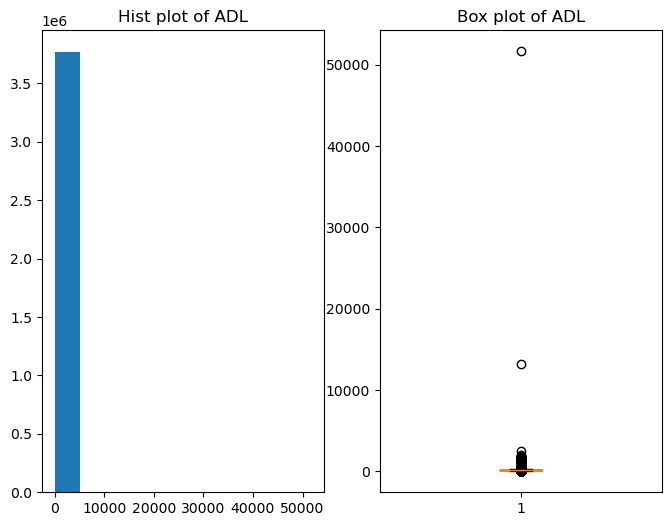

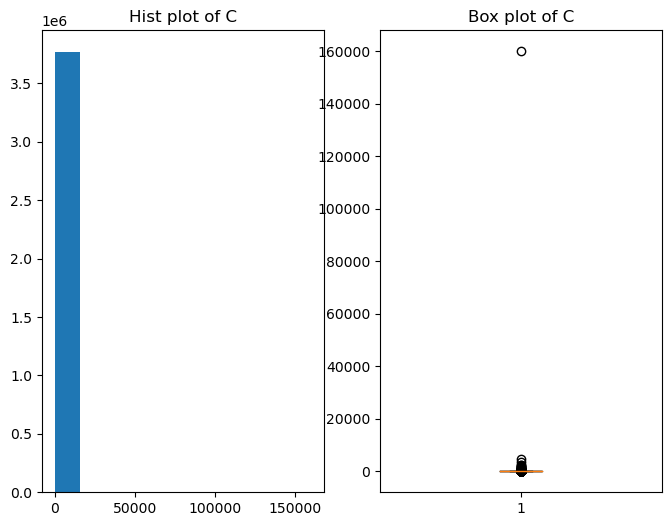

In [17]:
for col in df_numeric.columns:
    visualize_numrical_variable(col, df_numeric)

#### Category Variable

Count_values: UV895       10125
HS127        8236
UV084        7728
UV224        7305
UV872        7197
            ...  
HS5045          1
NO818375        1
UV92012         1
YU9626          1
UV20786         1
Name: FlightNo, Length: 17964, dtype: int64
Count_percent: UV895       2.690061e-03
HS127       2.188182e-03
UV084       2.053214e-03
UV224       1.940829e-03
UV872       1.912135e-03
                ...     
HS5045      2.656850e-07
NO818375    2.656850e-07
UV92012     2.656850e-07
YU9626      2.656850e-07
UV20786     2.656850e-07
Name: FlightNo, Length: 17964, dtype: float64


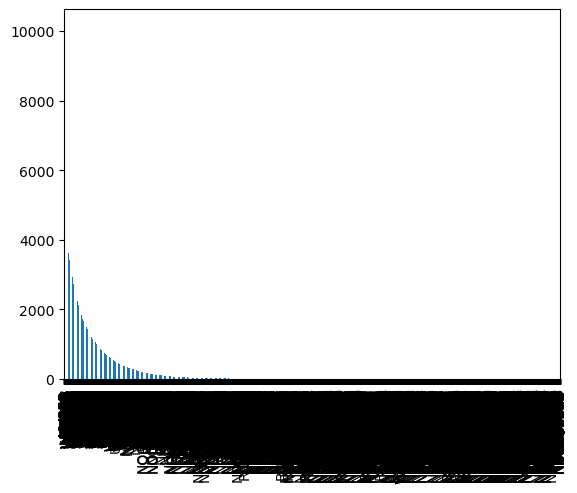

Count_values: A321      1687911
A320      1104038
AT72       213427
B738        92817
A21N        60229
           ...   
EMB190          1
C650            1
E650            1
DF9             1
F900B           1
Name: ACType, Length: 438, dtype: int64
Count_percent: A321      4.482650e-01
A320      2.932036e-01
AT72      5.668063e-02
B738      2.464977e-02
A21N      1.599525e-02
              ...     
EMB190    2.655738e-07
C650      2.655738e-07
E650      2.655738e-07
DF9       2.655738e-07
F900B     2.655738e-07
Name: ACType, Length: 438, dtype: float64


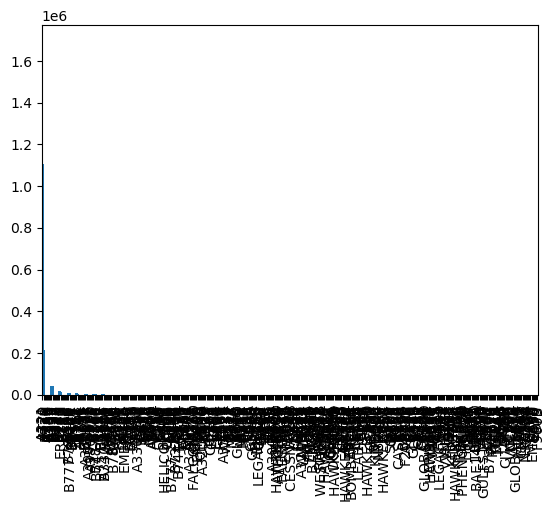

Count_values: YVF-USR    240129
USR-YVF    239139
XBC-YVF    137337
YVF-XBC    136022
USR-XBC    101646
            ...  
IZJ-XBC         1
TAZ-USR         1
USR-BGH         1
HJU-AYR         1
SFZ-VAU         1
Name: Route, Length: 2473, dtype: int64
Count_percent: YVF-USR    6.377200e-02
USR-YVF    6.350908e-02
XBC-YVF    3.647313e-02
YVF-XBC    3.612390e-02
USR-XBC    2.699453e-02
               ...     
IZJ-XBC    2.655739e-07
TAZ-USR    2.655739e-07
USR-BGH    2.655739e-07
HJU-AYR    2.655739e-07
SFZ-VAU    2.655739e-07
Name: Route, Length: 2473, dtype: float64


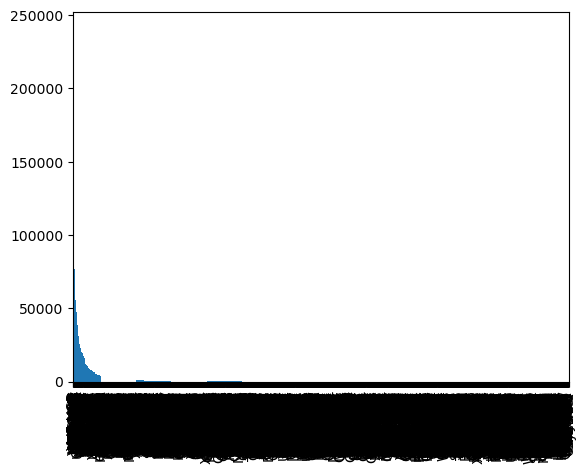

Count_values: YVF    1423605
USR     820370
XBC     418429
VAU     217905
OWP     142496
HNN     102295
UYK      92529
SBZ      83424
AYR      74891
BDK      65751
WLV      52486
IKM      49502
AAH      49114
PZA      42694
MTT      33641
OYV      32885
FSW      24896
XWQ      19160
JKB       9765
DVA       4949
QRO       4644
Name: BaseStation, dtype: int64
Count_percent: YVF    0.378072
USR    0.217869
XBC    0.111124
VAU    0.057870
OWP    0.037843
HNN    0.027167
UYK    0.024573
SBZ    0.022155
AYR    0.019889
BDK    0.017462
WLV    0.013939
IKM    0.013146
AAH    0.013043
PZA    0.011338
MTT    0.008934
OYV    0.008733
FSW    0.006612
XWQ    0.005088
JKB    0.002593
DVA    0.001314
QRO    0.001233
Name: BaseStation, dtype: float64


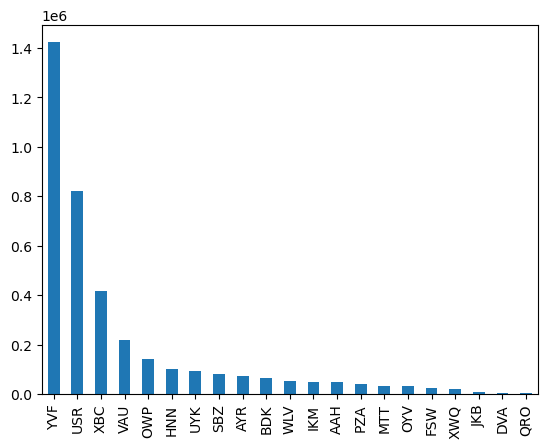

Count_values: PAX    3624546
CGO     140236
FER        646
Name: FlightType, dtype: int64
Count_percent: PAX    0.962585
CGO    0.037243
FER    0.000172
Name: FlightType, dtype: float64


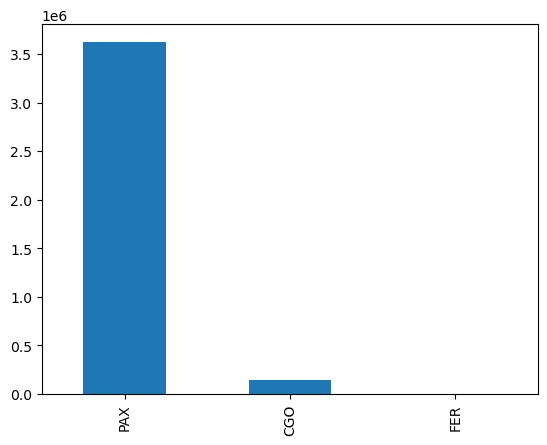

Count_values: HS    1256121
UV    1155122
JI     344072
NR     223755
WV     136964
       ...   
VT          2
MZ          1
PB          1
OG          1
KA          1
Name: Airline, Length: 140, dtype: int64
Count_percent: HS    3.337326e-01
UV    3.068986e-01
JI    9.141479e-02
NR    5.944836e-02
WV    3.638929e-02
          ...     
VT    5.313701e-07
MZ    2.656850e-07
PB    2.656850e-07
OG    2.656850e-07
KA    2.656850e-07
Name: Airline, Length: 140, dtype: float64


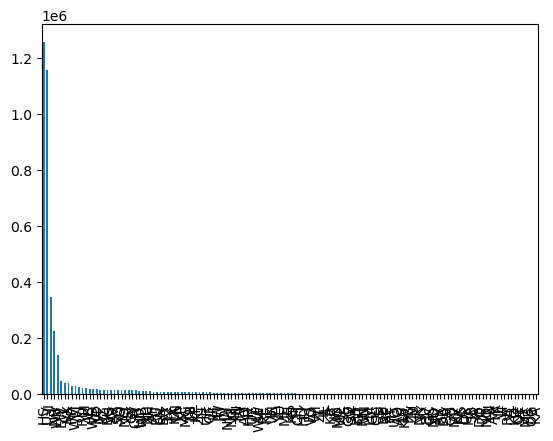

Count_values: DOM    2748840
INT    1016591
Name: domint, dtype: int64
Count_percent: DOM    0.73002
INT    0.26998
Name: domint, dtype: float64


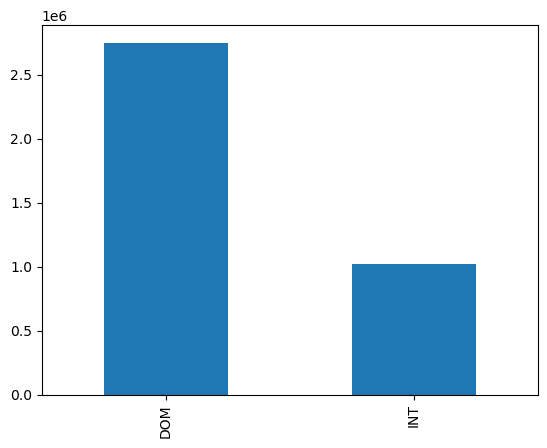

Count_values: A    1883811
D    1881620
Name: ArrDep, dtype: int64
Count_percent: A    0.500291
D    0.499709
Name: ArrDep, dtype: float64


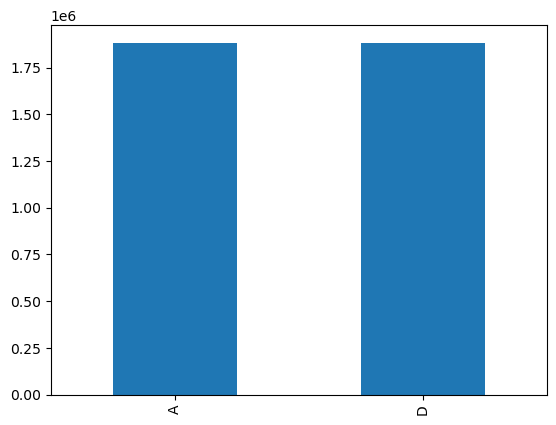

In [18]:
for col in df_category.columns:
    analyze_category_variable(col, df_category)